# Film Genre Statistics Explenatory Analysis

#### First import needed libraries and data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.widgets import CheckButtons
import mplcursors
from matplotlib.patches import Patch

In [4]:
df = pd.read_csv('./Movies.csv')   

In [5]:
#Have a look at data 

df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


####  Now let's clean the data . We can see that the first column 'index' is unnecessary and the titles have to be fixed

In [167]:
df = df.drop('index', axis = 1)

df.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [168]:
#change titles 

df.rename(columns = {
    'Movies Released'                               :'Release_Count',
    'Tickets Sold'                                  :'Tickets_Sold',
    'Inflation-Adjusted Gross'                      :'Adj_Gross',
    'Top Movie Gross (That Year)'                   :'Top_Gross_that_year',
    'Top Movie Inflation-Adjusted Gross (That Year)':'Top_Adj_Gross_that_year'
    
    }, inplace=True)
          
df.head()

,Genre,Year,Release_Count,Gross,Tickets_Sold,Adj_Gross,Top Movie,Top_Gross_that_year,Top_Adj_Gross_that_year
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [169]:
# change last column's type to integer 

df['Top_Adj_Gross_that_year']= df['Top_Adj_Gross_that_year'].astype(int)

In [170]:
df

,Genre,Year,Release_Count,Gross,Tickets_Sold,Adj_Gross,Top Movie,Top_Gross_that_year,Top_Adj_Gross_that_year
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,309615962
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,621343452
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,489832424
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,385534372
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,760054461
...,...,...,...,...,...,...,...,...,...
295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2835342
296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3508770
297,Reality,2014,1,16826,2059,18469,The Principle,16826,18469
298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,329104


# Now the data are ready for exploration


#### First we are checking some statistics for the dataset 



In [171]:
df.describe().astype(int)

,Year,Release_Count,Gross,Tickets_Sold,Adj_Gross,Top_Gross_that_year,Top_Adj_Gross_that_year
count,300,300,300,300,300,300,300
mean,2006,46,738207510,107874357,967632984,135001611,176625508
std,6,60,878301644,122745397,1101026216,139500590,173708909
min,1995,1,2010,225,2018,2010,2018
25%,2001,6,57865912,8275600,74232136,25287066,36039075
50%,2007,25,369411821,56346672,505429648,93513963,122336028
75%,2013,56,1294523505,185996760,1668390936,188622971,284190708
max,2018,287,4159137913,485184060,4352101018,742208942,847883130


## 1.Genres popularity exploration

### 1.1 What genre consistently attracted the largest audience, measured by total tickets sold from 1995 to 2018?

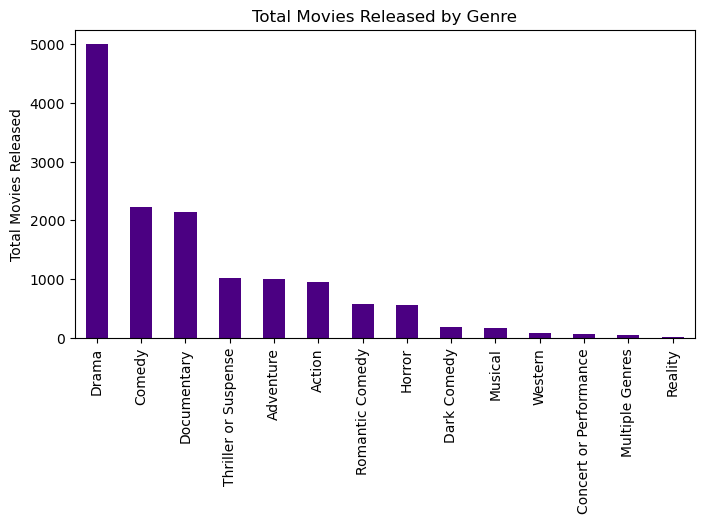

In [172]:
# Calculate the number of total movies released per genre 

movies_per_genre = df.groupby('Genre')['Release_Count'].sum().sort_values(ascending=False)

# Vizualize

plt.figure(figsize = (8,4))
movies_per_genre.plot(kind = 'bar', color = 'indigo')
plt.title('Total Movies Released by Genre')
plt.xlabel(None)
plt.ylabel('Total Movies Released')
plt.show()

### 2.1 Which Genres Attract the Most Audience Based on Ticket Sales?

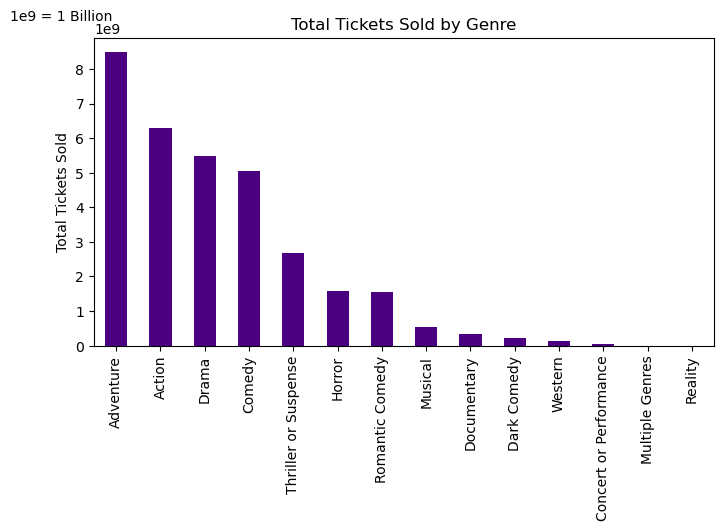

In [173]:
# Calculate total tickets sold per genre

df['Tickets_Sold'] = pd.to_numeric(df['Tickets_Sold'], errors='coerce')

tickets_sold_per_genre = df.groupby('Genre')['Tickets_Sold'].sum().sort_values(ascending=False)

# Visualize 
plt.figure(figsize=(8, 4))
ax= plt.gca()

tickets_sold_per_genre.plot(kind='bar', color='indigo')

plt.title('Total Tickets Sold by Genre')
plt.xlabel(None)
plt.ylabel('Total Tickets Sold')

plt.text(0.02, 0.95, '1e9 = 1 Billion', transform=plt.gcf().transFigure, fontsize=10, verticalalignment='top')
plt.show()


### 3.1 How have the popularity trends of different genres evolved over time ?

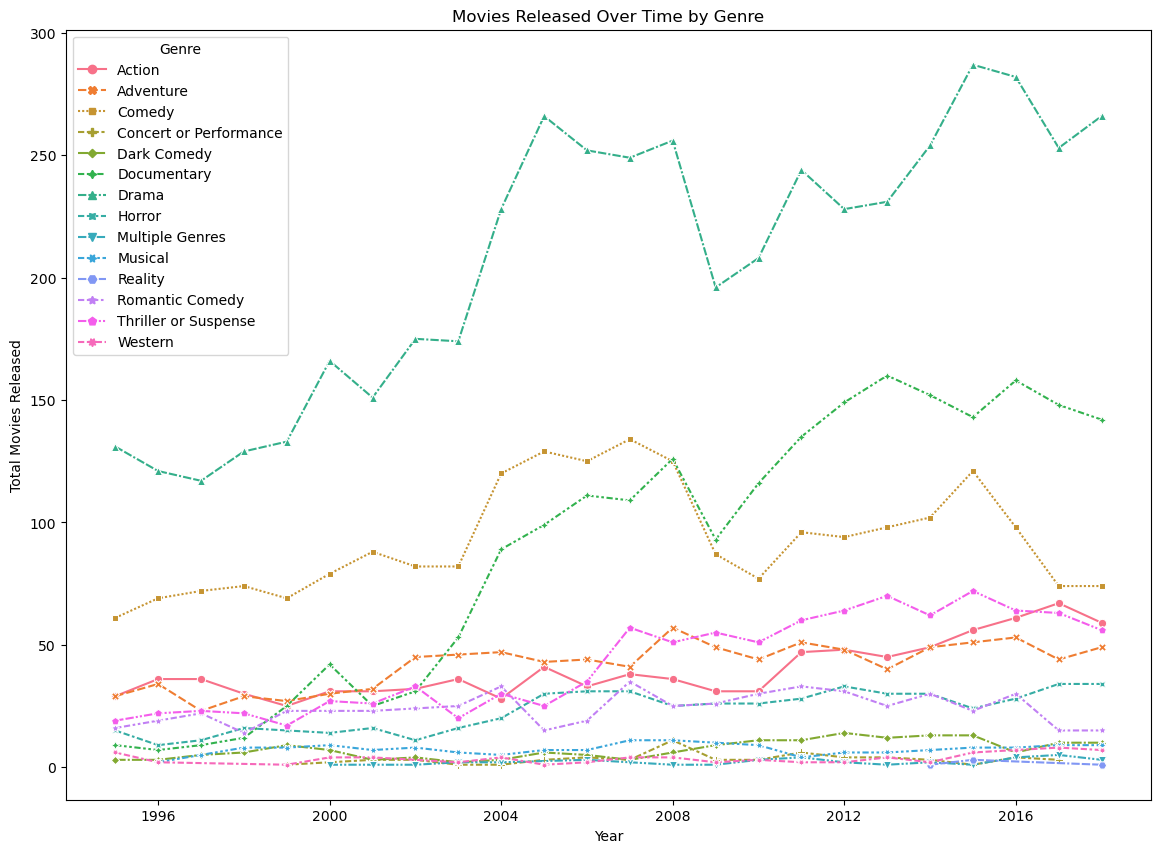

In [174]:
# Convert 'Year' to datetime if it's not already
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')

# Group by 'Year' and 'Genre', summing 'Movies Released'
grouped_data = df.groupby(['Year', 'Genre'])['Release_Count'].sum()

# Unstack the data and set 'Year' as the index
unstacked_data = grouped_data.unstack().reset_index()

# Set the 'Year' column as the index
unstacked_data.set_index('Year', inplace=True)

# Plot the data using Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(data=unstacked_data, markers= True,palette="husl")

# Set title and labels
plt.title('Movies Released Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Total Movies Released')

# Show the plot
plt.show()


## 2. Financial success of different genres

### 2.1 Which genre has the highest total gross revenue?

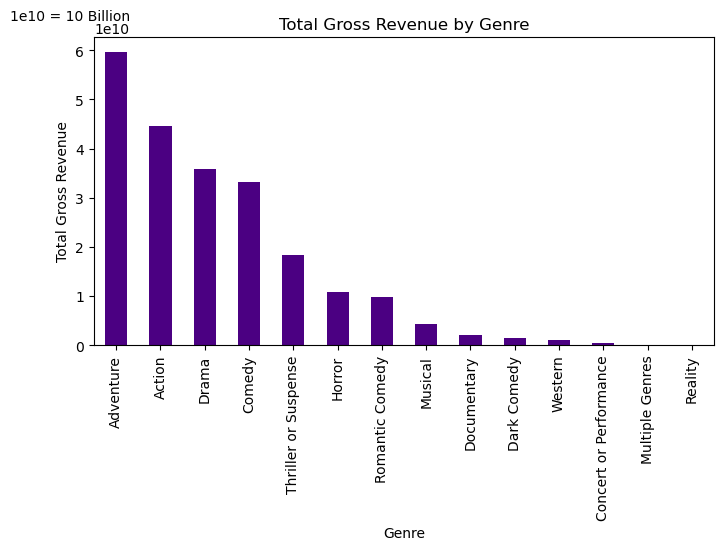

In [175]:
from matplotlib.ticker import ScalarFormatter


# Calculate total gross revenue for each genre
total_gross_by_genre = df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)

# Visualize the results
plt.figure(figsize=(8, 4))
total_gross_by_genre.plot(kind='bar', color='indigo')
plt.title('Total Gross Revenue by Genre')
plt.ylabel('Total Gross Revenue')

# Show the plot
plt.text(0.02, 0.95, '1e10 = 10 Billion', transform=plt.gcf().transFigure, fontsize=10, verticalalignment='top')

plt.show()


### 2.2 What Is the Distribution of Gross Revenue Across Genres?

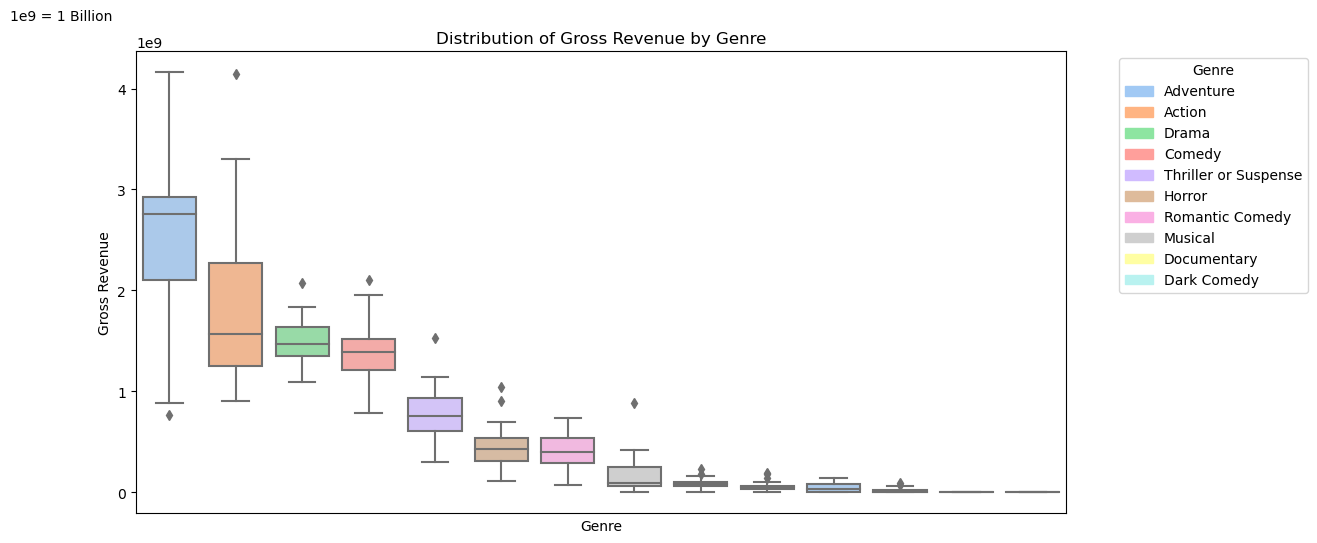

In [176]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a boxplot with Seaborn
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='Genre', y='Gross', data=df, palette=custom_palette)
plt.title('Distribution of Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')

# Remove x-axis ticks
boxplot.set_xticks([])

# Create custom legend labels
legend_labels = [Patch(color=color, label=genre) for color, genre in zip(custom_palette, df['Genre'].unique())]

# Add legend outside the boxplot
plt.legend(handles=legend_labels, title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(0.02, 0.95, '1e9 = 1 Billion', transform=plt.gcf().transFigure, fontsize=10, verticalalignment='top')
# Show the plot
plt.show()


### 2.3 How Are Financial Metrics Correlated in the Movie Industry?

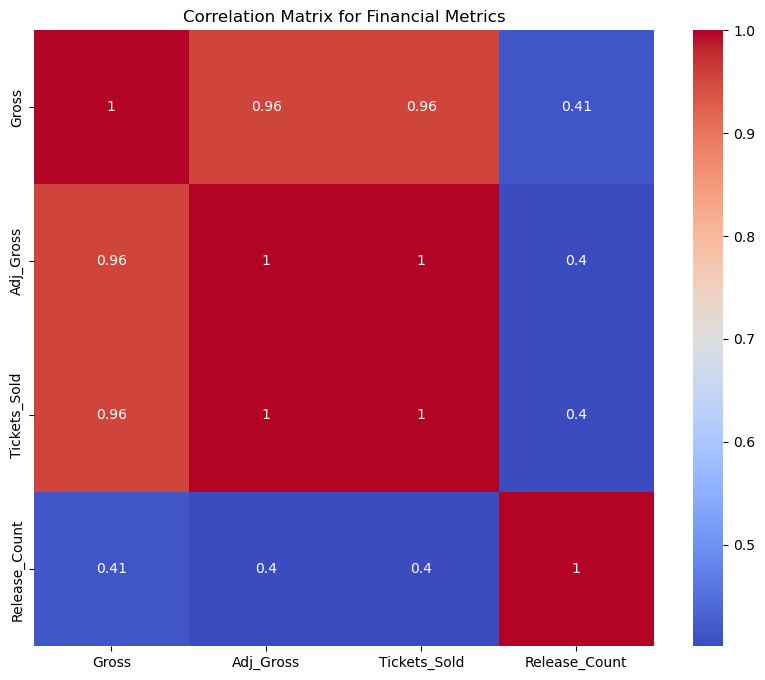

In [177]:
correlation_matrix = df[['Gross', 'Adj_Gross', 'Tickets_Sold', 'Release_Count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Financial Metrics')
plt.show()

## 3. Exploring Movie Trends Over Time

###  3.1. How has the total gross revenue from movies evolved over the years?"

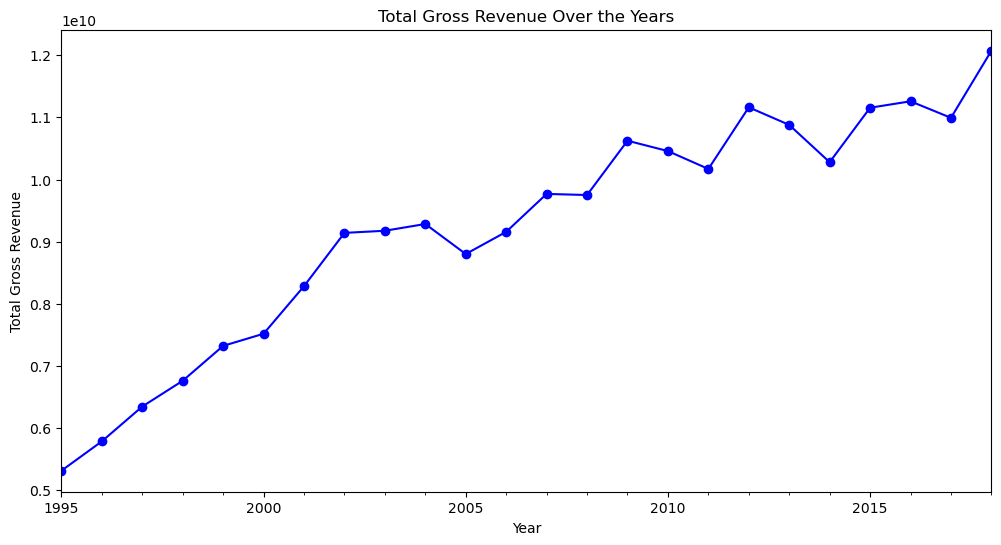

In [178]:
gross_revenue_over_years = df.groupby('Year')['Gross'].sum()

plt.figure(figsize=(12, 6))
gross_revenue_over_years.plot(kind='line', marker='o', color='blue')
plt.title('Total Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.show()


<Figure size 1400x800 with 0 Axes>

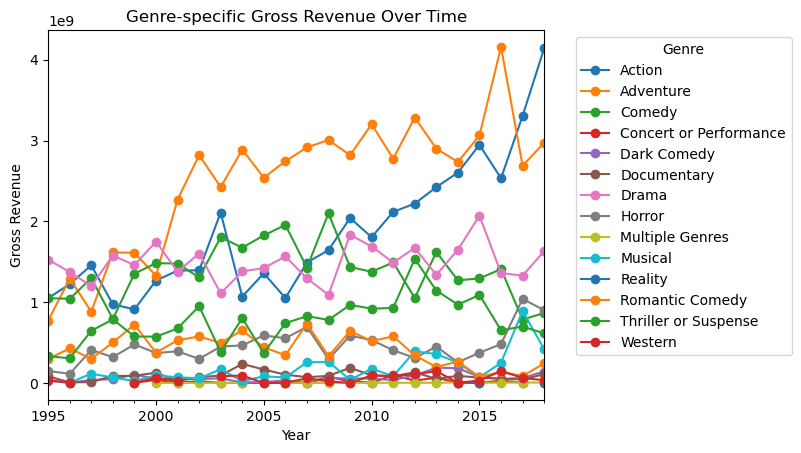

In [179]:
genre_gross_over_years = df.groupby(['Year', 'Genre'])['Gross'].sum().unstack()

plt.figure(figsize=(14, 8))
genre_gross_over_years.plot(kind='line', marker='o')
plt.title('Genre-specific Gross Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 4.  Analyzing Highest-Grossing Movies by Genre and Year

### 4.1 Which movies have been the highest-grossing in each genre overall?

In [183]:
# Identify the row with the maximum gross for each genre
idx_max_gross = df.groupby('Genre')['Top_Gross_that_year'].idxmax().sort_values(ascending=True)

# Extract the corresponding information
highest_grossing_per_genre = df.loc[idx_max_gross, ['Genre', 'Year', 'Top_Gross_that_year', 'Top Movie']].reset_index(drop=True)

# Rename columns for clarity
highest_grossing_per_genre.columns = ['Genre', 'Year', 'Top_Gross_that_year', 'Top Movie']
highest_grossing_per_genre['Year'] = highest_grossing_per_genre['Year'].dt.year

highest_grossing_per_genre = highest_grossing_per_genre.set_index('Genre', drop=True, )

# Display the result as a table
print(highest_grossing_per_genre)


                        Year  Top_Gross_that_year  \
Genre                                               
Adventure               2015            742208942   
Action                  2018            700059566   
Drama                   2004            370274604   
Comedy                  2009            277322503   
Thriller or Suspense    1998            443319081   
Horror                  2017            327481748   
Romantic Comedy         2002            227898505   
Musical                 2017            504014165   
Documentary             2004            119114517   
Dark Comedy             2013             87923123   
Western                 2012            106280122   
Concert or Performance  2011             73013910   
Multiple Genres         2018              3508777   
Reality                 2015               309297   

                                                   Top Movie  
Genre                                                         
Adventure               S

### Exploring the Evolution of Highest-Grossing Movies Across Genres Over the Years

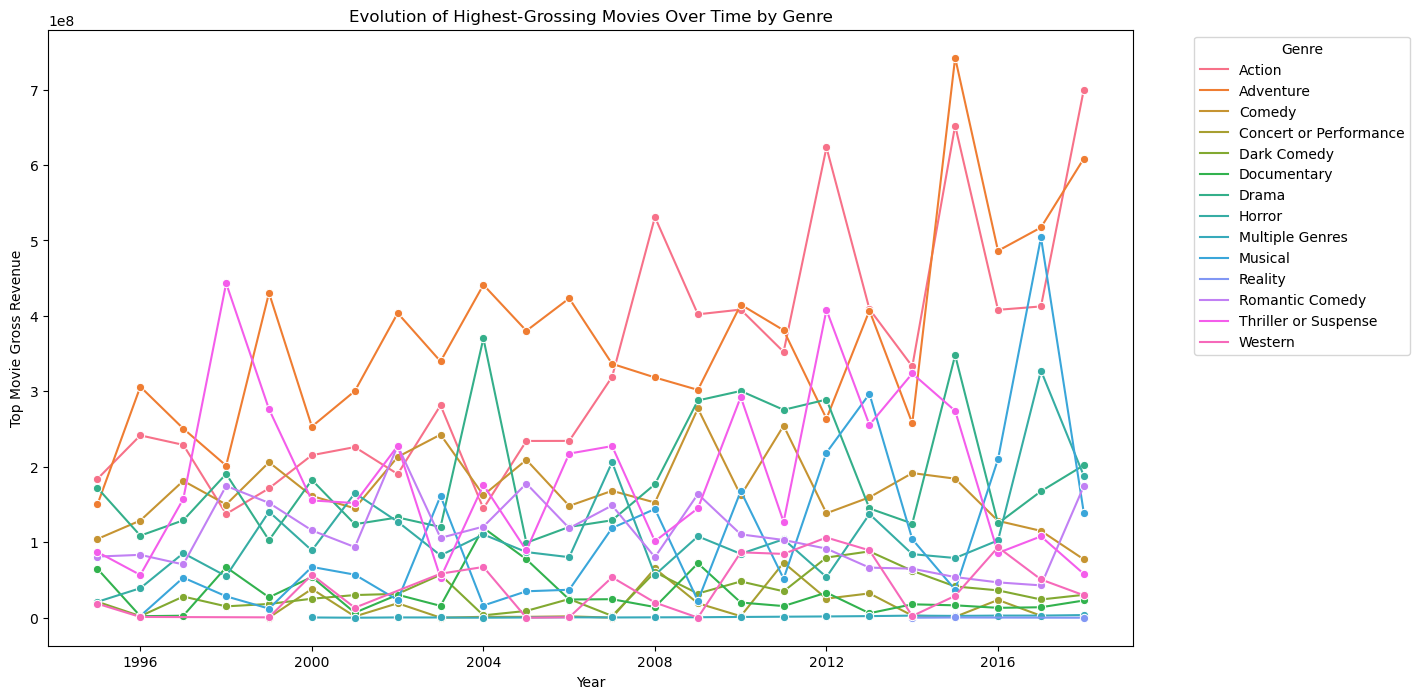

In [184]:
highest_grossing_movies_over_time = df.groupby(['Genre', 'Year'])[['Top_Gross_that_year', 'Top Movie']].max().reset_index()

# Visualize the trends using a line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=highest_grossing_movies_over_time, x='Year', y='Top_Gross_that_year', hue='Genre', marker='o')
plt.title('Evolution of Highest-Grossing Movies Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Top Movie Gross Revenue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
